In [19]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
# Connect to SQLite database

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [21]:
# Create a sample 'sales' table

cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    );
""")

In [22]:
# Insert sample data

sample_data = [
    ('Apple', 10, 0.50),
    ('Banana', 20, 0.30),
    ('Orange', 15, 0.40),
    ('Apple', 5, 0.50),
    ('Banana', 10, 0.30),
    ('Orange', 10, 0.40),
]

In [23]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?);", sample_data)
conn.commit()

In [24]:
# Run SQL query to summarize sales

query = """
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        SUM(quantity * price) AS revenue 
    FROM sales 
    GROUP BY product;
"""

In [25]:
# Load results into pandas DataFrame

df = pd.read_sql_query(query, conn)

In [26]:
# Print the results

print("Sales Summary:")
print(df)

Sales Summary:
  product  total_qty  revenue
0   Apple         60     30.0
1  Banana        120     36.0
2  Orange        100     40.0


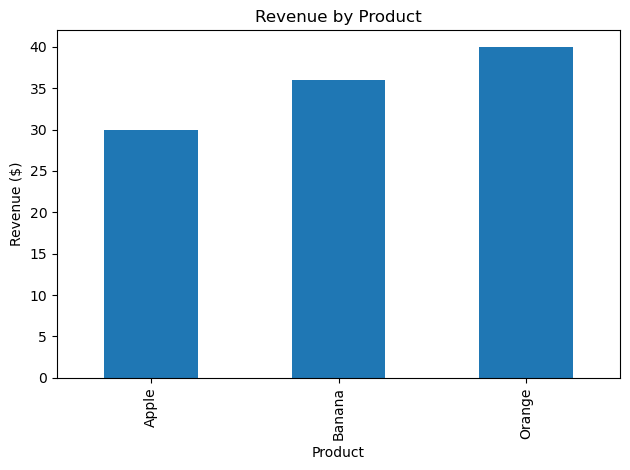

In [27]:
#  Plot a bar chart of revenue by product

df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()

In [15]:
plt.savefig("sales_chart.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
conn.close()